In [1]:
import pandas as pd
import numpy as np

In [2]:
c = [
    ["tp", "ur"],
    [-10.2, 99],
    [12, 120]
]
df = pd.DataFrame(c[1:], columns=c[0])
df

,tp,ur
0,-10.2,99
1,12.0,120


SORT BY VALUE con nuovo index aggiornato

In [3]:
tp = df.sort_values(by='tp', ascending=False, ignore_index=True)
tp

,tp,ur
0,12.0,120
1,-10.2,99


In [4]:
df #se non uso inplace sopra, l'originale viene mantenuto

,tp,ur
0,-10.2,99
1,12.0,120


FILTERING

In [5]:
df[(df['ur'] >= 0)]

,tp,ur
0,-10.2,99
1,12.0,120


ROW

In [6]:
print(type(df.loc[1]))
df.loc[1]

<class 'pandas.core.series.Series'>


tp     12.0
ur    120.0
Name: 1, dtype: float64

COLUMNS

In [7]:
print(type(df["tp"]))
df["tp"]

<class 'pandas.core.series.Series'>


0   -10.2
1    12.0
Name: tp, dtype: float64

GET ELEMENT

In [8]:
df["tp"].loc[0]

np.float64(-10.2)

In [9]:
df.loc[0]["tp"]

np.float64(-10.2)

In [10]:
df.tp.loc[0] # df. solo per colonne

np.float64(-10.2)

SELECT SUBSET BY INDEXES:

iloc prende solo indici

loc prende indici e label per righe, solo label per colonne

In [11]:
df.iloc[[1,0], [0,1]] #indice di righe e indice di colonne

,tp,ur
1,12.0,120
0,-10.2,99


SELECT SUBSET BY LABELS

In [12]:
df.loc[[1,0], ["tp","ur"]]

,tp,ur
1,12.0,120
0,-10.2,99


In [13]:
df.loc[:, "tp":]

,tp,ur
0,-10.2,99
1,12.0,120


LABELS IN ROW

In [14]:
c2 = [
    ["tp", "ur"],
    [-10.2, 99],
    [12, 120]
]
df2 = pd.DataFrame(c[1:], columns=c[0], index=["zero", "uno"])
df2

,tp,ur
zero,-10.2,99
uno,12.0,120


In [15]:
df2.loc[[1,0], ["tp","ur"]]

KeyError: "None of [Index([1, 0], dtype='int64')] are in the [index]"

In [175]:
df2.loc[["uno","zero"], ["tp","ur"]]

,tp,ur
uno,12.0,120
zero,-10.2,99


In [178]:
df2.iloc[[0,1], [0,1]]

,tp,ur
zero,-10.2,99
uno,12.0,120


SELECT LIST OF ROW

In [66]:
df.loc[[0,1]]

,tp,ur
0,-10.2,99
1,12.0,120


SELECT LIST OF COLUMN

In [139]:
df[["tp", "ur"]] #prima quadra seleziona le colonne e io passo una lista di colonne

,tp,ur
0,-10.2,99
1,12.0,120


PROVE DI STD

In [179]:
pd.Series([0.1, 0.3, 0.3, 0.3, 0.3, 0.3]).std()



np.float64(0.0816496580927726)

FALLISCE il controllo std < 0.1 come da norma

Uso massima differenza nella finestra (esempio finestra di 3 valori)

In [190]:

ap = pd.DataFrame({'B': [0.3, 0.3, 0.3, 0.2, 0.3, 0.3]})

ap["B"].rolling(window=3).max()

0    NaN
1    NaN
2    0.3
3    0.3
4    0.3
5    0.3
Name: B, dtype: float64

In [191]:
ap["B"].rolling(window=3).min()

0    NaN
1    NaN
2    0.3
3    0.2
4    0.2
5    0.2
Name: B, dtype: float64

ELIMINO DOVE È < 0.1

In [192]:
ap["B"].rolling(window=3).max() - ap["B"].rolling(window=3).min()

0    NaN
1    NaN
2    0.0
3    0.1
4    0.1
5    0.1
Name: B, dtype: float64

DIFF FRA DIREZIONI

In [197]:
225 % 337.5

225.0

In [138]:
pd.Series([337.5, 0]).std()

np.float64(238.64853865045978)

In [210]:
dir = pd.Series([0, 337.5, 337.5, 0, 337.5, 337.5])
dir.rolling(window=3).max() - dir.rolling(window=3).min()

0      NaN
1      NaN
2    337.5
3    337.5
4    337.5
5    337.5
dtype: float64

In [209]:
dir = pd.Series([0, 337.5, 337.5, 0, 337.5, 337.5])
dir.rolling(window=3).max() - dir.rolling(window=3).min()

0      NaN
1      NaN
2    337.5
3    337.5
4    337.5
5    337.5
dtype: float64

COPY or ASSIGN

In [234]:
c3 = [
    ["tp", "ur"],
    [-10.2, 99],
    [12, 120]
]
df3 = pd.DataFrame(c[1:], columns=c[0])
df3

,tp,ur
0,-10.2,99
1,12.0,120


In [223]:
df4 = df3.copy() # NB altrimenti modifico anche df3

In [221]:
df4.insert(2, "boh", [100, 200])
df4

,tp,ur,boh
0,-10.2,99,100
1,12.0,120,200


In [222]:
df3

,tp,ur
0,-10.2,99
1,12.0,120


In [235]:
c4 = c3.copy()

In [236]:
c4.append([100, 300])

In [237]:
c4

[['tp', 'ur'], [-10.2, 99], [12, 120], [100, 300]]

In [238]:
c3

[['tp', 'ur'], [-10.2, 99], [12, 120]]

non funziona così per le variabili 

In [239]:
a = 4
b = a

In [243]:
b += 1
b

6

In [244]:
a

4

In [17]:
from windrose import WindroseAxes

In [22]:
N = 500
ws = np.random.random(N) * 6
wd = np.random.random(N) * 360

[None, None, None]

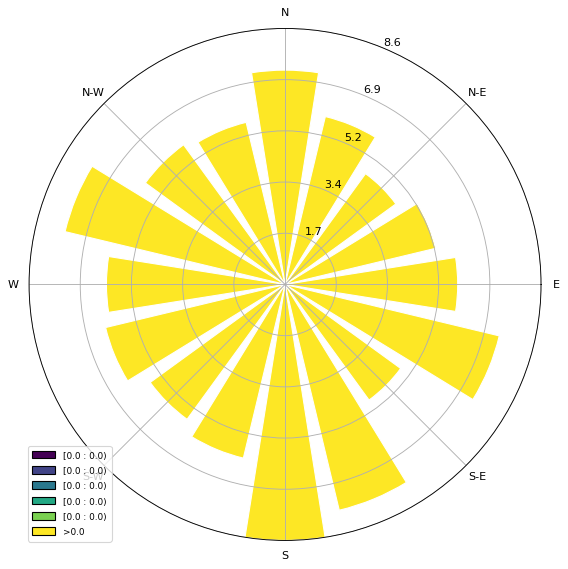

In [24]:
ax = WindroseAxes.from_ax()
ax.bar(wd, [0]*N, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

In [262]:
import matplotlib.pyplot as plt

#table image from dataframe
fix, ax = plt.subplots(figsize=(4,1))
ax.axis('off')
ax.set_title("", loc='center')
table = pd.plotting.table(ax, df, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1)
plt.savefig('FIGURE/speed_compare_davis.png', dpi=300, bbox_inches='tight')

TypeError: 'builtin_function_or_method' object is not subscriptable